<h1 style="font-family: 'poppins'; font-weight: bold; color: Blue;">👨‍💻Author: Muhammad Faheem Iqbal</h1>

[![GitHub](https://img.shields.io/badge/GitHub-Profile-blue?style=for-the-badge&logo=github)](https://github.com/FaheemAI1024)
[![Kaggle](https://img.shields.io/badge/Kaggle-Profile-blue?style=for-the-badge&logo=kaggle)](https://www.kaggle.com/muhammadfaheemiqbal) 
[![LinkedIn](https://img.shields.io/badge/LinkedIn-Profile-blue?style=for-the-badge&logo=linkedin)](https://www.linkedin.com/in/muhammad-faheem-iqbal-ai-solutions-architect-b630932ab/)  

[![Facebook](https://img.shields.io/badge/Facebook-Profile-blue?style=for-the-badge&logo=facebook)](https://www.facebook.com/aammar.tufail) 
[![TikTok](https://img.shields.io/badge/TikTok-Profile-blue?style=for-the-badge&logo=tiktok)](https://www.tiktok.com/@data_scientist04?_t=8kW2bLg8CFl&_r=1)
[![HuggingFace](https://img.shields.io/badge/huggingface-Profile-yellow?style=for-the-badge&logo=huggingface)](https://huggingface.co/FaheemAi1024)

[![Twitter/X](https://img.shields.io/badge/Twitter-Profile-blue?style=for-the-badge&logo=twitter)](https://x.com/MFaheem113141?t=__88BWMyKGZcC08sw3SJtA&s=09) 
[![Instagram](https://img.shields.io/badge/Instagram-Profile-blue?style=for-the-badge&logo=instagram)](https://www.instagram.com/i_am_faheeeem?igsh=MXhlcG0zdTZ6Mnl5Yw==) 
[![Email](https://img.shields.io/badge/Email-Contact%20Me-red?style=for-the-badge&logo=email)](mailto:faheemiqbalbwn2002@gmail.com)



### Step-by-Step Code for Data Exploration and Preprocessing
 This includes loading the data, performing basic EDA, and handling missing values.

#### Step 1: Import Important Libraries

In [1]:
# #Downloade Module
# !pip install opencv-python

In [ ]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

#### Step 2: Load All Data from Directory

In [3]:
def show_sample_images(image_dir, num_samples=5):
    """
    Display a specified number of sample images from a given directory.

    Parameters:
    - image_dir (str): Path to the directory containing images.
    - num_samples (int): Number of sample images to display.
    """
    # Get a list of image files in the directory
    image_files = os.listdir(image_dir)
    
    # Ensure the number of samples does not exceed the number of available images
    num_samples = min(num_samples, len(image_files))
    
    # Randomly select the specified number of image files
    sample_files = np.random.choice(image_files, num_samples, replace=False)
    
    # Set up the plot
    plt.figure(figsize=(15, 10))
    
    for i, file_name in enumerate(sample_files):
        image_path = os.path.join(image_dir, file_name)
        
        # Read the image using OpenCV
        image = cv2.imread(image_path)
        
        # Check if the image was successfully loaded
        if image is not None:
            # Convert the image from BGR (OpenCV default) to RGB (matplotlib default)
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            
            # Add a subplot for each image
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(image)
            plt.title(file_name)
            plt.axis('off')
        else:
            print(f"Warning: Unable to load image {image_path}")
    
    # Display the plot
    plt.show()

Sample images from the 'benign' directory:


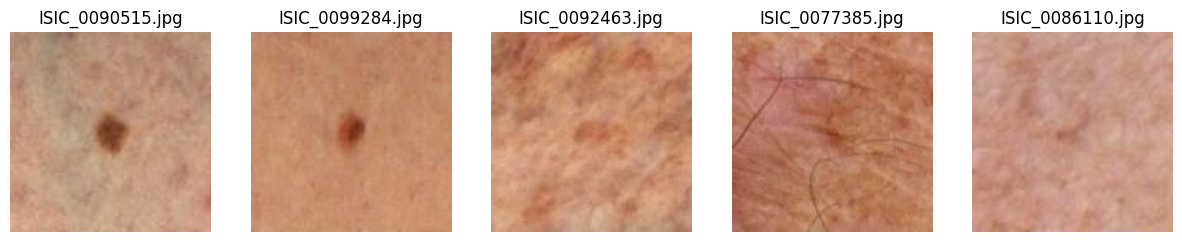

Sample images from the 'malignant' directory:


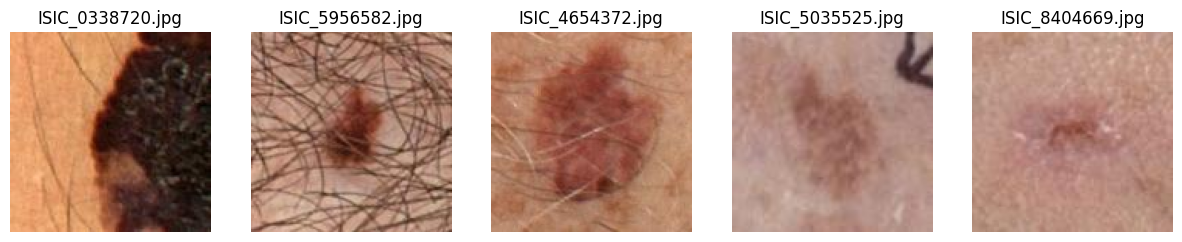

In [4]:
# Define the master directory containing the 'benign' and 'malignant' subdirectories
master_dir = "/kaggle/input/skin-lession/organized_skin_lession"

# Define paths to the 'benign' and 'malignant' directories
benign_dir = os.path.join(master_dir, "benign")
malignant_dir = os.path.join(master_dir, "malignant")

# Display sample images from the 'benign' directory
print("Sample images from the 'benign' directory:")
show_sample_images(benign_dir)

# Display sample images from the 'malignant' directory
print("Sample images from the 'malignant' directory:")
show_sample_images(malignant_dir)



#### Step 3: Show All Data Step by Step

**3.1: Show Images**
To display sample images, you can use the following code:

In [5]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

def preprocess_image(image_path, target_size=(224, 224)):
    """
    Preprocess the image: read, resize, and normalize.

    Parameters:
    - image_path (str): Path to the image file.
    - target_size (tuple): Desired image size (width, height).

    Returns:
    - image (numpy array): Preprocessed image.
    """
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Unable to load image at {image_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, target_size)
    image = image / 255.0  # Normalize to [0, 1]
    return image

def segment_lesion(image):
    """
    Segment the lesion using thresholding and contour detection.

    Parameters:
    - image (numpy array): Preprocessed image.

    Returns:
    - mask (numpy array): Binary mask of the lesion.
    """
    gray = cv2.cvtColor((image * 255).astype(np.uint8), cv2.COLOR_RGB2GRAY)
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    mask = np.zeros_like(gray)
    if contours:
        largest_contour = max(contours, key=cv2.contourArea)
        cv2.drawContours(mask, [largest_contour], -1, 255, thickness=cv2.FILLED)
    return mask

In [6]:
def show_sample_images(image_dir, num_samples=5):
    """
    Display sample images with lesion segmentation and size.

    Parameters:
    - image_dir (str): Directory containing images.
    - num_samples (int): Number of samples to display.
    """
    image_files = os.listdir(image_dir)
    sample_files = np.random.choice(image_files, num_samples, replace=False)
    
    plt.figure(figsize=(15, 10))
    for i, file_name in enumerate(sample_files):
        image_path = os.path.join(image_dir, file_name)
        image = preprocess_image(image_path)
        mask = segment_lesion(image)
        lesion_size = calculate_lesion_size(mask)
        
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(image)
        plt.title(f"Original: {file_name}")
        plt.axis('off')
        
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(mask, cmap='gray')
        plt.title(f"Lesion Size: {lesion_size:.2f} sq units")
        plt.axis('off')
    
    plt.show()


In [7]:
def calculate_lesion_size(mask, pixel_spacing=(1.0, 1.0)):
    """
    Calculate the lesion size based on the binary mask.

    Parameters:
    - mask (numpy array): Binary mask of the lesion.
    - pixel_spacing (tuple): Physical size of a pixel (height, width).

    Returns:
    - lesion_area (float): Area of the lesion in square units.
    """
    pixel_area = np.sum(mask > 0)
    lesion_area = pixel_area * pixel_spacing[0] * pixel_spacing[1]
    return lesion_area


Sample images from 'benign' directory:


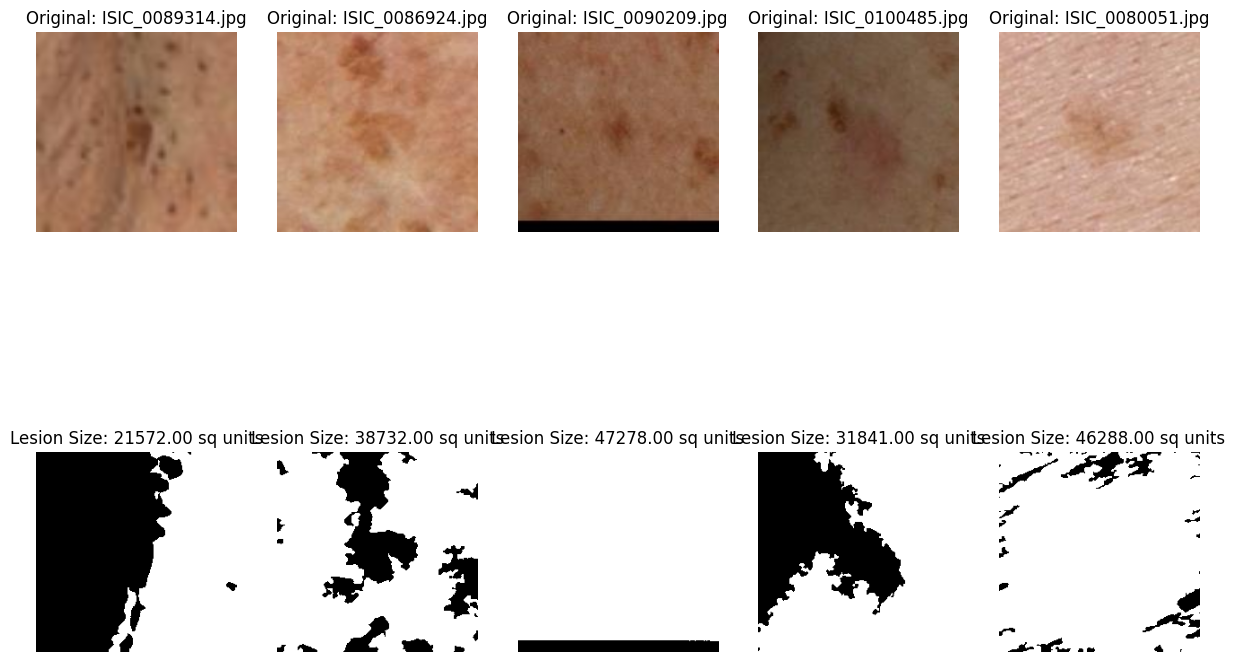

In [8]:

# # Define directories
# benign_dir = "/kaggle/input/skin-lession/organized_skin_lession/benign"
# malignant_dir = "/kaggle/input/skin-lession/organized_skin_lession/malignant"

# Display sample images from 'benign' and 'malignant' directories
print("Sample images from 'benign' directory:")
show_sample_images(benign_dir)

Sample images from 'malignant' directory:


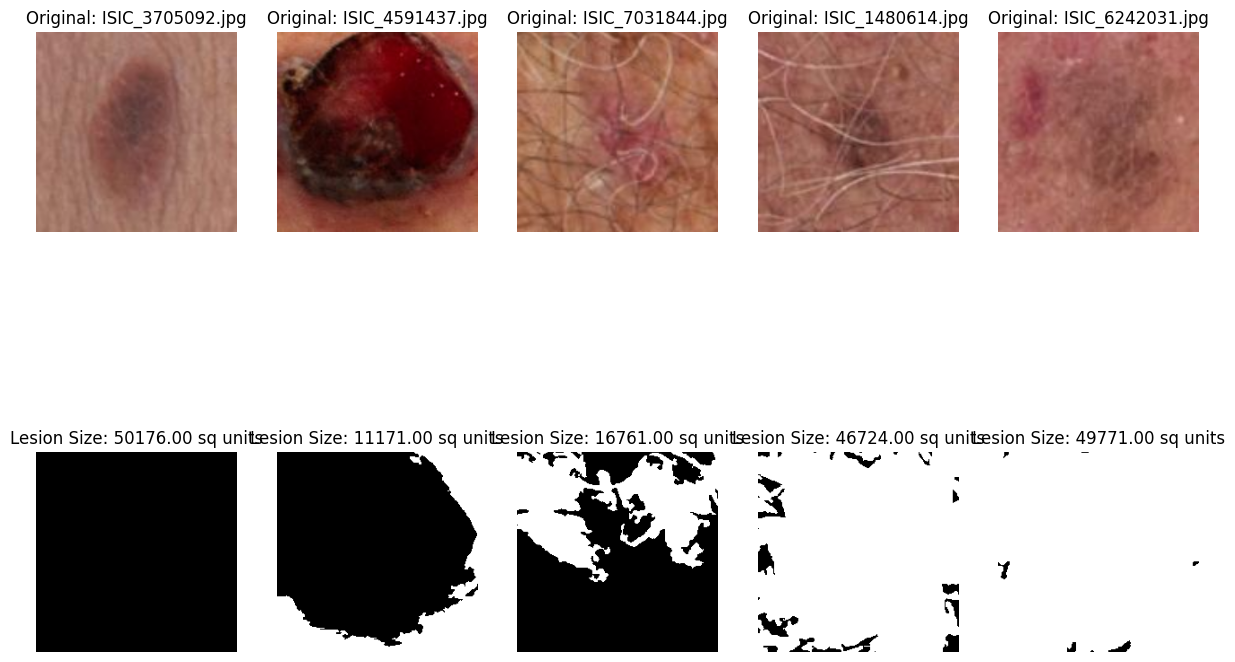

In [9]:

print("Sample images from 'malignant' directory:")
show_sample_images(malignant_dir)

**3.2: Show Metadata**

In [10]:
def measure_lesion_size(image_path):
    """
    Measure the size of a skin lesion in an image.

    Parameters:
    - image_path (str): Path to the image file.

    Returns:
    - lesion_area (float): Area of the lesion in square pixels.
    - bounding_box (tuple): Coordinates of the bounding box around the lesion (x, y, width, height).
    """
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error: Unable to load image {image_path}")
        return None, None

    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    if not contours:
        print(f"No lesion found in image {image_path}")
        return None, None

    lesion_contour = max(contours, key=cv2.contourArea)
    lesion_area = cv2.contourArea(lesion_contour)
    x, y, w, h = cv2.boundingRect(lesion_contour)
    bounding_box = (x, y, w, h)

    return lesion_area, bounding_box

# Example usage
image_path = os.path.join(benign_dir, os.listdir(benign_dir)[0])
area, bbox = measure_lesion_size(image_path)
print(f"Lesion area: {area} square pixels")
print(f"Bounding box: {bbox}")


Lesion area: 4734.5 square pixels
Bounding box: (0, 5, 135, 130)


**3.3: Image Segmentation**

In [11]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the master directory containing the 'benign' and 'malignant' subdirectories
master_dir = "/kaggle/input/skin-lession/organized_skin_lession"

# Define paths to the 'benign' and 'malignant' directories
benign_dir = os.path.join(master_dir, "benign")
malignant_dir = os.path.join(master_dir, "malignant")

# Parameters
img_height, img_width = 224, 224  # Image dimensions
batch_size = 32  # Number of images to process in a batch

# Create an ImageDataGenerator instance with augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,  # Normalize pixel values to [0, 1]
    rotation_range=20,  # Randomly rotate images by up to 20 degrees
    width_shift_range=0.2,  # Randomly shift images horizontally by 20% of the width
    height_shift_range=0.2,  # Randomly shift images vertically by 20% of the height
    shear_range=0.2,  # Shear transformations
    zoom_range=0.2,  # Zoom in/out by 20%
    horizontal_flip=True,  # Randomly flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels after transformations
)

# Create a training data generator
train_generator = train_datagen.flow_from_directory(
    master_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'  # Since it's a binary classification problem
)


Found 1434 images belonging to 2 classes.


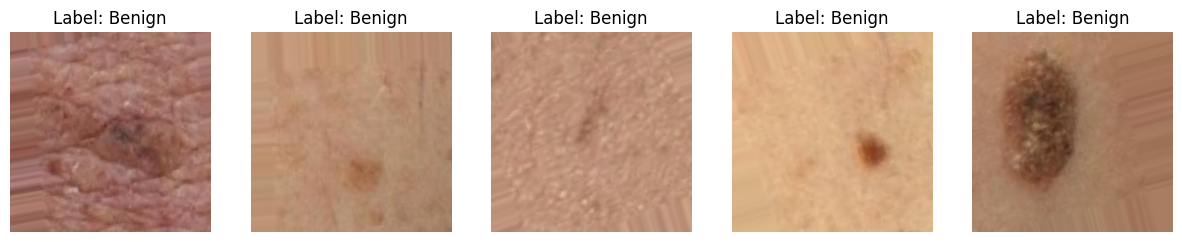

In [12]:
# Display sample augmented images
import matplotlib.pyplot as plt
import numpy as np

def show_augmented_images(generator, num_images=5):
    # Get a batch of images and labels
    images, labels = next(generator)
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(f'Label: {"Malignant" if labels[i] else "Benign"}')
        plt.axis('off')
    plt.show()

# Display sample augmented images
show_augmented_images(train_generator)

#### Step 4: Build the Model

**4.1: Check Column Names**

In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define the master directory containing the 'benign' and 'malignant' subdirectories
master_dir = "/kaggle/input/skin-lession/organized_skin_lession"

# Define paths to the 'benign' and 'malignant' directories
benign_dir = os.path.join(master_dir, "benign")
malignant_dir = os.path.join(master_dir, "malignant")

# Image dimensions
img_width, img_height = 224, 224
input_shape = (img_width, img_height, 3)

# Data augmentation and normalization for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    validation_split=0.2  # Use 20% of data for validation
)

# Data generators
train_generator = train_datagen.flow_from_directory(
    master_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    master_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

# Build a simple CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train the model
epochs = 50
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // validation_generator.batch_size,
    epochs=epochs
)

Found 1148 images belonging to 2 classes.
Found 286 images belonging to 2 classes.


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


35/35 ━━━━━━━━━━━━━━━━━━━━ 105s 3s/step - accuracy: 0.6688 - loss: 1.2622 - val_accuracy: 0.7227 - val_loss: 0.5644
Epoch 2/50
 1/35 ━━━━━━━━━━━━━━━━━━━━ 1:20 2s/step - accuracy: 0.9062 - loss: 0.4012

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.9062 - loss: 0.4012 - val_accuracy: 0.7667 - val_loss: 0.5280
Epoch 3/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 134s 3s/step - accuracy: 0.7436 - loss: 0.5637 - val_accuracy: 0.7344 - val_loss: 0.5756
Epoch 4/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6875 - loss: 0.6297 - val_accuracy: 0.7000 - val_loss: 0.6102
Epoch 5/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 139s 3s/step - accuracy: 0.7353 - loss: 0.5674 - val_accuracy: 0.7227 - val_loss: 0.5334
Epoch 6/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.6875 - loss: 0.5024 - val_accuracy: 0.8333 - val_loss: 0.3988
Epoch 7/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 98s 3s/step - accuracy: 0.7754 - loss: 0.4996 - val_accuracy: 0.7656 - val_loss: 0.4777
Epoch 8/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.8750 - loss: 0.3396 - val_accuracy: 0.8333 - val_loss: 0.4312
Epoch 9/50
35/35 ━━━━━━━━━━━━━━━━━━━━ 99s 3s/step - accuracy: 0.7762 - loss: 0.4992 - val_accuracy: 0.8086 - val_loss: 0.44

In [14]:
# Save the trained model
model.save('/kaggle/working/skin_lesion_classifier.h5')

In [15]:
# Assuming you have a test data generator similar to your training and validation generators
test_generator = train_datagen.flow_from_directory(
    master_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use a separate subset or a different directory for actual test data
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Found 286 images belonging to 2 classes.
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 922ms/step - accuracy: 0.8349 - loss: 0.3907
Test Loss: 0.4082
Test Accuracy: 0.8252


In [ ]:
# Assuming you have a test data generator similar to your training and validation generators
test_generator = train_datagen.flow_from_directory(
    master_dir,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Use a separate subset or a different directory for actual test data
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")


In [ ]:
from tensorflow.keras.models import load_model

# Load the model from the file
model = load_model('/kaggle/working/skin_lesion_classifier.h5')


In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image

def load_and_preprocess_image(img_path, target_size=(224, 224)):
    # Load the image with the target size
    img = image.load_img(img_path, target_size=target_size)
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the model's input shape
    img_array = np.expand_dims(img_array, axis=0)
    # Normalize pixel values to [0, 1]
    img_array /= 255.0
    return img_array


In [18]:
def predict_image(img_path):
    # Preprocess the image
    processed_image = load_and_preprocess_image(img_path)
    # Predict the probability of the image being malignant
    prediction = model.predict(processed_image)[0][0]

    # Determine the class based on the prediction
    if prediction >= 0.5:
        result = "Malignant"
        confidence = prediction * 100
    else:
        result = "Benign"
        confidence = (1 - prediction) * 100

    return result, confidence

# Example usage
img_path = '/kaggle/input/skin-lession/organized_skin_lession/benign/ISIC_0074366.jpg'
result, confidence = predict_image(img_path)
print(f"Prediction: {result} with {confidence:.2f}% confidence")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
Prediction: Benign with 56.39% confidence


In [21]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from tensorflow.keras.preprocessing import image

# Function to load and preprocess the image
def load_and_preprocess_image(img_path, target_size=(224, 224)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values to [0, 1]
    return img_array

# Prediction function that returns the result and confidence score
def predict_image(img_path):
    # Preprocess the image
    processed_image = load_and_preprocess_image(img_path)
    # Predict the probability of the image being malignant
    prediction = model.predict(processed_image)[0][0]
    
    # Determine the class based on the prediction
    if prediction >= 0.5:
        result = "Malignant"
        confidence = prediction * 100
    else:
        result = "Benign"
        confidence = (1 - prediction) * 100
        
    return result, confidence

# Function to display the image along with its image id and prediction results
def display_prediction(img_path):
    result, confidence = predict_image(img_path)
    # Extract image ID from filename (without extension)
    image_id = os.path.basename(img_path).split('.')[0]
    
    # Load image using OpenCV for display
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    # Display image with title showing image id and prediction
    plt.imshow(img)
    plt.title(f"Image ID: {image_id}\nPrediction: {result} ({confidence:.2f}% confidence)")
    plt.axis("off")
    plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


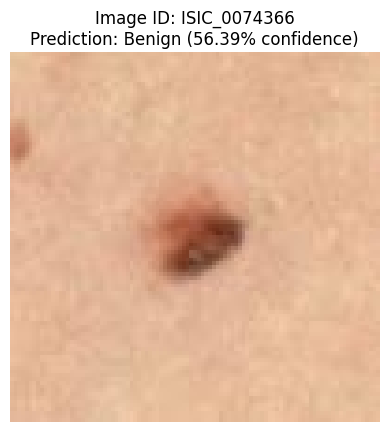

In [22]:
# Example usage
img_path = '/kaggle/input/skin-lession/organized_skin_lession/benign/ISIC_0074366.jpg'
display_prediction(img_path)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step


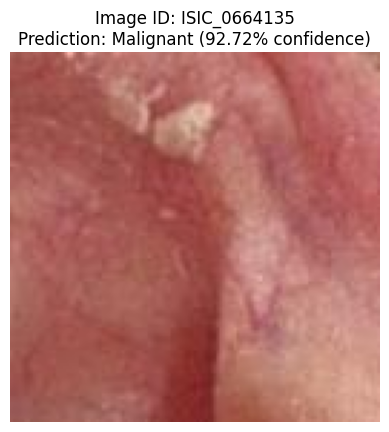

In [24]:
# Example usage
img_path = '/kaggle/input/skin-lession/organized_skin_lession/malignant/ISIC_0664135.jpg'
display_prediction(img_path)